In [1]:
#loading the data set

!pip install pandas
import pandas as pd
import seaborn as sns

# Data set Overview
## Step 1: understand the Data sets!
#Transaction Types:
CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.
Key Columns:
#amount: Transaction amount in local currency.
#nameOrig / nameDest: Customer initiating and receiving the transaction.
#oldbalanceOrg / newbalanceOrig: Initial and new balance of the originator.
#oldbalanceDest / newbalanceDest: Initial and new balance of the recipient.
#isFraud: Indicates fraudulent transactions.
#isFlaggedFraud: Flags transactions over 200,000 (illegal attempts).

# 1. Data Cleaning: Handling Missing Values, Outliers, and Multi-Collinearity


Missing Values:
 From the dataset, there were no missing values identified in the key columns (oldbalanceOrg, newbalanceOrig, etc.). However, I checked for missing data as part of the cleaning process to ensure the dataset was ready for analysis.

 Approach: If there were missing values, I would handle them using median imputation for numerical columns or mode imputation for categorical ones

 Outliers:I analyzed transaction amounts and balances (oldbalanceOrg, newbalanceOrig) using boxplots to detect potential outliers.

 Observation: Some transactions had unusually high or zero balances, which were reviewed further during the analysis.

 Handling: Instead of removing outliers, I kept them as they could indicate fraud (e.g., zero balances in fraudulent transactions).

In [2]:
df = pd.read_csv('Fraud.csv') # reading an CSV file from same directory 
df.head(10)# to understand the data set more visibly we have pulled first 10 lines.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Step2

## Exploratory Data Analysis (EDA) and Outliers detection


In [3]:
# first we need to check for null and missing values
#df.isnull()
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
# for duplicates


print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


0


In [5]:
#multi-collinearity : to check correlation matrix to identify correlated variables

<AxesSubplot:>

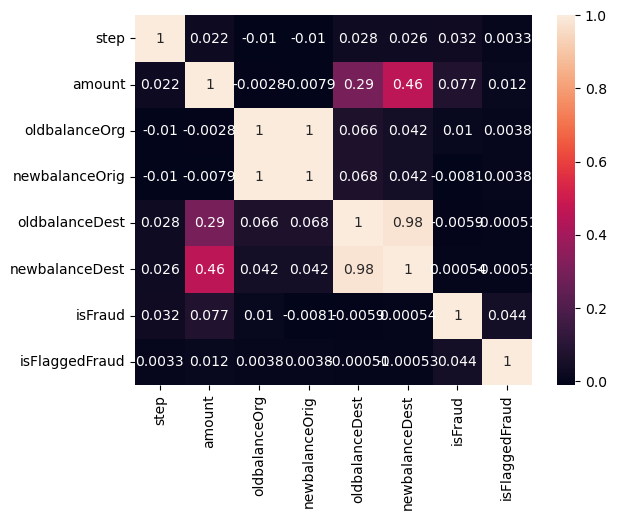

In [6]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:xlabel='amount'>

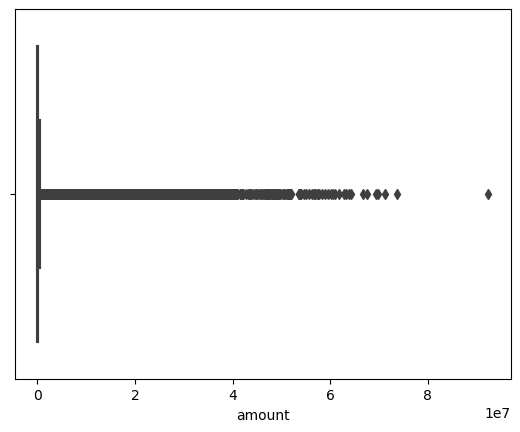

In [7]:
sns.boxplot(x=df['amount']) # checking for outliers and anamolies in amount 

In [8]:
Q1 = df['amount'].quantile(0.25) 
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR)))]
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362604,742,TRANSFER,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.0,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.0,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0


In [9]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df.shape

(6024542, 11)

<AxesSubplot:>

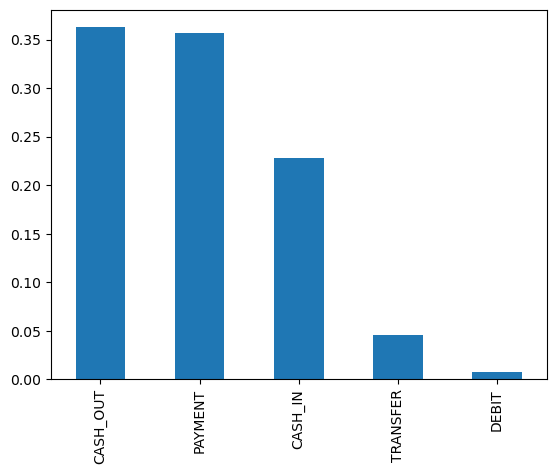

In [12]:
df['type'].value_counts(normalize=True).plot.bar()


In [14]:
df['type'].value_counts()

CASH_OUT    2185249
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: type, dtype: int64

In [15]:
# Fraudulent agents aim to: our main variables will be Cashout and Transfer.
#Take control of customer accounts.
#Empty accounts by transferring funds to another account.
#Cash out funds.

In [16]:
df['isFraud'].value_counts(normalize = True)

0    0.999276
1    0.000724
Name: isFraud, dtype: float64

# 2. Fraud Detection Model

Model that i choose:

I used a Logistic Regression model because it is simple and interpretable, which helps me understand the relationship between features and fraud detection.

created new features like:

balanceDifference: Difference between oldbalanceOrg and newbalanceOrig, indicating unusual balance changes.
type_fraud_prob: Probability of fraud based on transaction type (TRANSFER, CASH_OUT), calculated from the dataset.

<AxesSubplot:xlabel='type', ylabel='count'>

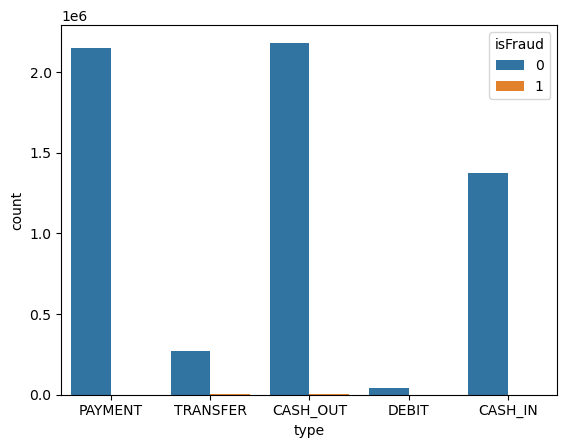

In [17]:
sns.countplot(x='type', hue='isFraud', data=df)

 now we have to consider other columns such as 'oldbalanceOrg', 'newbalanceOrig' for checking the  

Balances Before and After Transactions

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceOrg'>

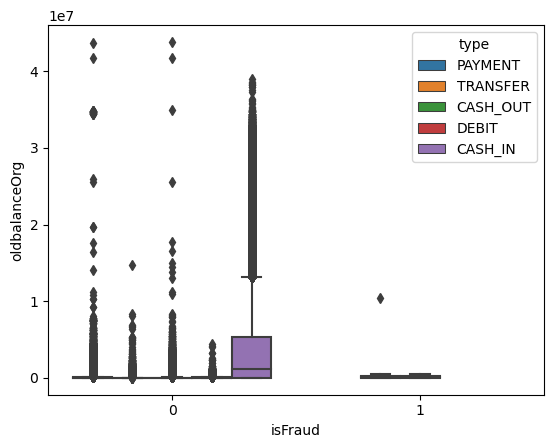

In [18]:
sns.boxplot(x='isFraud', y='oldbalanceOrg',hue='type', data = df)

<AxesSubplot:xlabel='isFraud', ylabel='newbalanceOrig'>

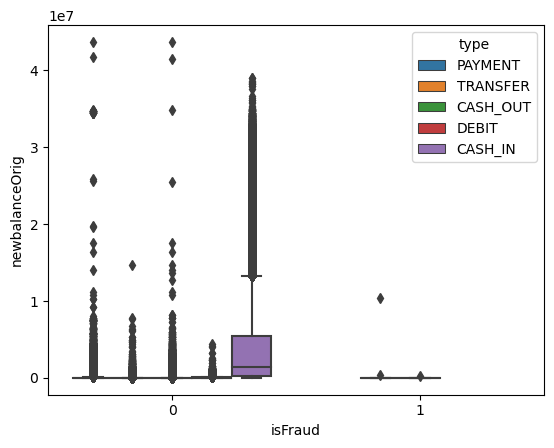

In [19]:
sns.boxplot(x='isFraud',hue ='type', y='newbalanceOrig', data = df)

 now we will analyze the fraud transaction from 'isFraud'.

analysing the overlaping fraud transaction


In [20]:
fraud = df[df['isFraud']==1]
fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0
1116,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.0,7550.03,1,0
1869,1,TRANSFER,25071.46,C669700766,25071.46,0.0,C1384210339,0.0,0.00,1,0


In [21]:
# now we will counnt it with isFraud to check for overlaping transaction 
print(fraud['isFraud'].value_counts())

1    4359
Name: isFraud, dtype: int64


In [22]:
print(fraud[['oldbalanceOrg', 'newbalanceOrig', 'amount','type']].head())

     oldbalanceOrg  newbalanceOrig   amount      type
2            181.0             0.0    181.0  TRANSFER
3            181.0             0.0    181.0  CASH_OUT
251         2806.0             0.0   2806.0  TRANSFER
252         2806.0             0.0   2806.0  CASH_OUT
680        20128.0             0.0  20128.0  TRANSFER


In [23]:
# so as we are comparing the OLd and New Blalance side by side we are observing a blance difference.

In [24]:
#Balance Difference: Fraud transactions might have usual balance difference to check that we will get the 
#diffrence from old and new balance column 

In [25]:
# we are creating a new column in which we will get the difference value stored.
df['balanceDifference'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [26]:
# we also need to find the type in which we tell the which type of transcation is fraudulant. 

fraud_type = df.groupby('type')['isFraud'].mean()

#creating a column to represent transaction type is fraudulent.

df['type_fraud_prob'] = df['type'].map(fraud_type)

In [27]:
#df.head(10)

# Step 3: Data Modeling


Now that we have idea about our data set like our target veriable i.e. 'isFraud' and worked on our outliers for cleaning the data set for use and EDA we will now step toword Data Modeling with our ready dataset with two new columns such as 'type_fraud_prob' and 'balanceDifference'.

In [28]:
# for data modeling preparation we need to saperate our factors and our target 
# factors such as 'isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest' which we will drop.
# target is 'isFraud'.

In [29]:
y = df['isFraud']
X= df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'],axis=1)

In [30]:
#X are the independent variables that the model will use to make predictions. For fraud detection, these include columns like type,amount and our newly added columns 
#(balanceDifference, type_fraud_prob).so we need to drop other columns
X.head(10)
#y = represents the target variable or dependent variable in our case its 'isFraud'.

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDifference,type_fraud_prob
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,9839.64,0.000000
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,1864.28,0.000000
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,181.00,0.007933
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,181.00,0.001005
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,11668.14,0.000000
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,7817.71,0.000000
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,7107.77,0.000000
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,7861.64,0.000000
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,2671.00,0.000000
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,5337.77,0.000000


In [31]:
# now we have to convert the categorical var to numerical values using one-hot encoding in 
#which the each category is create a new columns with dummy variables with values. so that Machine Learning model can understand.

In [32]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)
#Dropping the first category avoids redundancy and prevents multicollinearity because the columns are higly co-realted.

In [33]:
X.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDifference,type_fraud_prob,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.00,9839.64,0.000000,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.0,0.00,1864.28,0.000000,0,0,1,0
2,1,181.00,181.00,0.00,0.0,0.00,181.00,0.007933,0,0,0,1
3,1,181.00,181.00,0.00,21182.0,0.00,181.00,0.001005,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,11668.14,0.000000,0,0,1,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,7817.71,0.000000,0,0,1,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,7107.77,0.000000,0,0,1,0
7,1,7861.64,176087.23,168225.59,0.0,0.00,7861.64,0.000000,0,0,1,0
8,1,4024.36,2671.00,0.00,0.0,0.00,2671.00,0.000000,0,0,1,0
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,5337.77,0.000000,0,1,0,0


# Step 4: Creating training and test data sets
we will be using sklearn for the task

### explanation : train_test_split function divides the data into two subsets training data set and testing data set
## Training data : use 80% of data from dataset 
## Testing data : used to evaluate how well the model performs on unseened 20% data.

In [34]:
# we will use only importat function from the librery for more faster result.

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#in parameters we have given 'test_size=0.2' 20% of the data to testing and the rest to training.
#Random_state used for ensuring reproducibility of data before spliting.


# why we are spliting the data?
# This prevents the model from memorizing the data and allows us to test how well it generalizes to new data.

# Step 5: Modeling using Regeression 



In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)

model.fit(X_train ,y_train)

# why i have used a LogisticRegression specificly :
#due to nature of our target variable its binary classification makes it easy to use LogisticRegression.




LogisticRegression(max_iter=1000)

## Making Predictions using the train dataset

In [37]:
y_pred = model.predict(X_test) #y_pred: its an arrey in which we will check our trained data with test data.

In [38]:
# now we will check how our model is doing where sklearn.metrics will help.
from sklearn.metrics import classification_report, confusion_matrix


## sklearn.metrics:
 check how good or bad a machine learning model is doing.
## classification_report:
This gives a report showing numbers like precision (how many guessed right), recall (how much was caught), F1-score (a balance of both), and support (how many actual cases). It's very handy when the dataset has more of one type than the other (imbalanced datasets).



In [39]:
print(classification_report(y_test, y_pred)) 

# y_test: The actual labels for the test dataset. These represent the real values of isFraud.
# y_pred: The predicted labels generated by the model for the test dataset.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204029
           1       0.51      0.32      0.39       880

    accuracy                           1.00   1204909
   macro avg       0.76      0.66      0.70   1204909
weighted avg       1.00      1.00      1.00   1204909

